# AI MoodMate: Model Comparison and Final Selection

This notebook documents the experiments conducted to find the best model for the emotion detection task. It includes several attempts and concludes with the best-performing model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -o "/content/drive/My Drive/AI_Project/archive.zip" -d "/content/drive/My Drive/AI_Project/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_65242339.jpg  
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_65267116.jpg  
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_65275626.jpg  
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_6529266.jpg  
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_65329617.jpg  
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_65338712.jpg  
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_65338797.jpg  
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_65387162.jpg  
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_65404494.jpg  
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_65426218.jpg  
  inflating: /content/drive/My Drive/AI_Project/train/sad/Training_65430136.jpg  
  inflating: /content/drive/My Drive/AI_Project/

In [ ]:
print("--- Copying dataset to local runtime for faster access ---")
!cp -r "/content/drive/My Drive/AI_Project/train" "/content/train"
!cp -r "/content/drive/My Drive/AI_Project/test" "/content/test"
print("--- Copying complete! ---")

--- Copying dataset to local runtime for faster access ---
--- Copying complete! ---


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,454,407 (9.36 MB)

 Trainable params: 2,453,703 (9.36 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 550s 2s/step - accuracy: 0.2033 - loss: 2.4626 - val_accuracy: 0.2151 - val_loss: 20.0173
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 593s 2s/step - accuracy: 0.2494 - loss: 1.9711 - val_accuracy: 0.2761 - val_loss: 2.2614
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 542s 2s/step - accuracy: 0.2839 - loss: 1.8194 - val_accuracy: 0.3005 - val_loss: 1.7162
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 554s 2s/step - accuracy: 0.3220 - loss: 1.7115 - val_accuracy: 0.3245 - val_loss: 1.6747
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 536s 1s/step - accuracy: 0.3445 - loss: 1.6605 - val_accuracy: 0.3634 - val_loss: 1.6142
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 529s 1s/step - accuracy: 0.3775 - loss: 1.5972 - val_accuracy: 0.3701 - val_loss: 1.6397
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 533s 1s/step - accuracy: 0.3942 - loss: 1.5594 - val_accuracy: 0.4018 - val_loss: 1.5772
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - accuracy: 0.4134 - loss: 1.5179 - val_accuracy: 0.42

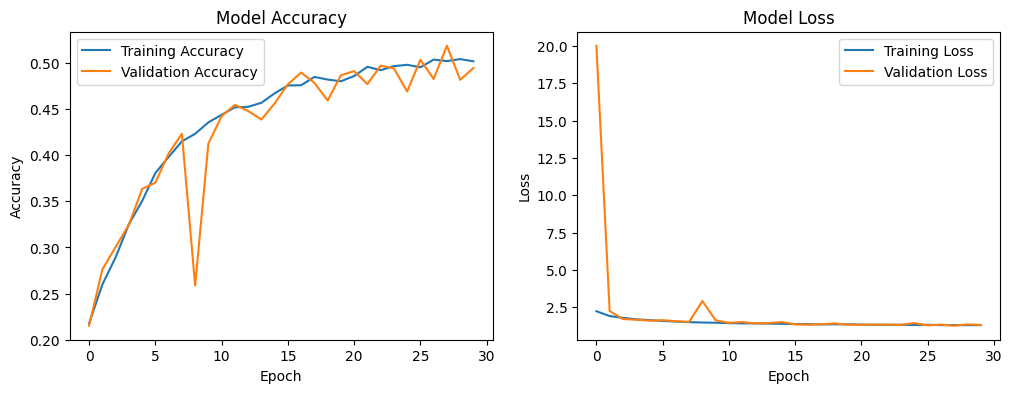

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- Paths are pointing to the fast local storage ---
train_dir = "/content/train"
test_dir = "/content/test"
# ----------------------------------------------------

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

TARGET_SIZE = (48, 48)
COLOR_MODE = "grayscale"
BATCH_SIZE = 64

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=TARGET_SIZE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# CUSTOM CNN MODEL (FASTER VERSION)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# TRAINING
epochs = 30
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# EVALUATION & PLOTTING
test_loss, test_acc = model.evaluate(test_data)
print(f"\n✅ Final Test Accuracy with Custom CNN: {test_acc*100:.2f}%")

model.save('/content/drive/My Drive/AI_Project/emotion_model_custom_cnn_fast.keras')
print("✅ Custom CNN model saved successfully to your Google Drive!")

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Setting up test dataset... ---
Found 7178 images belonging to 7 classes.

Loading saved model from: /content/drive/My Drive/AI_Project/emotion_model_custom_cnn_fast.keras
Model loaded successfully!

Generating predictions on the test set...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 274ms/step

--- Classification Report ---
              precision    recall  f1-score   support

       angry       0.54      0.26      0.35       958
     disgust       0.52      0.10      0.17       111
        fear       0.46      0.12      0.19      1024
       happy       0.71      0.84      0.77      1774
     neutral       0.41      0.71      0.52      1233
         sad       0.40      0.40      0.40      1247
    surprise       0.65      0.73      0.69       831

    accuracy                           0.54      7178
   macro avg       0.53      0.45      0.44      7178
weighted avg       0.54      0.54      0.50      7178


--- Confusion Matrix ---


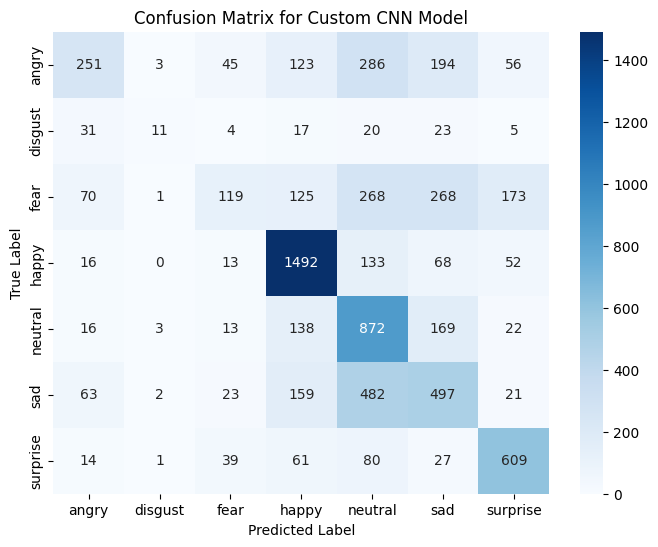

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive
import os

# --- STEP 1: SETUP (Mount Drive and prepare data paths) ---
# This ensures we have access to the saved model and the test data
drive.mount('/content/drive')
if not os.path.exists('/content/test'):
    print("--- Setting up test dataset... ---")
    !unzip -o -q "/content/drive/My Drive/AI_Project/archive.zip" "test/*" -d /content/
else:
    print("--- Test dataset already set up. ---")

# --- STEP 2: PREPARE THE TEST DATA GENERATOR ---
# This must exactly match the settings used during training
test_dir = "/content/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical",
    shuffle=False  # Important: Do not shuffle test data
)

# --- STEP 3: LOAD YOUR SAVED MODEL ---
# Instead of training, we load the model you already saved
model_path = "/content/drive/My Drive/AI_Project/emotion_model_custom_cnn_fast.keras"
print(f"\nLoading saved model from: {model_path}")
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

# --- STEP 4: GENERATE PREDICTIONS AND REPORTS ---
print("\nGenerating predictions on the test set...")
# Get the model's predictions
y_pred_probabilities = model.predict(test_data)
# Convert probabilities to class labels (0, 1, 2, etc.)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Get the true labels from the test data generator
y_true_classes = test_data.classes

# Get the names of the emotions
class_names = list(test_data.class_indices.keys())

# Generate and print the Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Generate and plot the Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Custom CNN Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

--- Loading the original image file ---
Shape of the original image: (48, 48, 1)

--- Simulating what your NEW training script does ---
Shape of the image fed to the model: (48, 48, 1)

--- Conclusion: The images are NOT blurry because we are using the original 48x48 size. ---


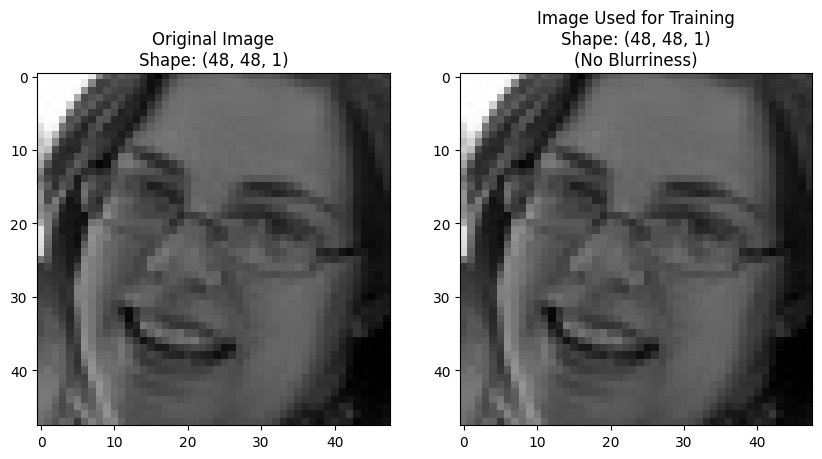

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# --- IMPORTANT: UPDATE THIS PATH ---
# Go to your file browser, find any image in your train/happy folder,
# right-click it, and copy its path here.
image_path = '/content/drive/My Drive/AI_Project/train/happy/Training_10019449.jpg'
# ------------------------------------

print("--- Loading the original image file ---")
# Load the image in its original grayscale format and size
original_pil = load_img(image_path, color_mode="grayscale", target_size=(48, 48))
original_array = img_to_array(original_pil)
print(f"Shape of the original image: {original_array.shape}")

print("\n--- Simulating what your NEW training script does ---")
# Your new script also loads it as (48, 48) grayscale. The only change is rescaling.
processed_array = original_array / 255.0
print(f"Shape of the image fed to the model: {processed_array.shape}")

print("\n--- Conclusion: The images are NOT blurry because we are using the original 48x48 size. ---")

# Displaying the images for visual proof
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(original_array), cmap='gray')
plt.title(f"Original Image\nShape: {original_array.shape}")

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(processed_array), cmap='gray')
plt.title(f"Image Used for Training\nShape: {processed_array.shape}\n(No Blurriness)")
plt.show()

In [ ]:
!cp -r "/content/drive/My Drive/AI_Project/train" "/content/train"
!cp -r "/content/drive/My Drive/AI_Project/test" "/content/test"

--- FINAL EXPERIMENT: Custom CNN with SGD Optimizer ---
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,454,407 (9.36 MB)

 Trainable params: 2,453,703 (9.36 MB)

 Non-trainable params: 704 (2.75 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.1965 - loss: 2.2832 - val_accuracy: 0.1024 - val_loss: 9.6470
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.2429 - loss: 1.8141 - val_accuracy: 0.1259 - val_loss: 5.0740
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.2685 - loss: 1.7803 - val_accuracy: 0.2534 - val_loss: 1.9524
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.2704 - loss: 1.7735 - val_accuracy: 0.2627 - val_loss: 1.8526
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.2779 - loss: 1.7594 - val_accuracy: 0.2792 - val_loss: 1.7699
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.2847 - loss: 1.7504 - val_accuracy: 0.2628 - val_loss: 1.8022
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.2941 - loss: 1.7354 - val_accuracy: 0.2949 - val_loss: 1.7405
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.3001 - loss: 1.7292 - val_accu

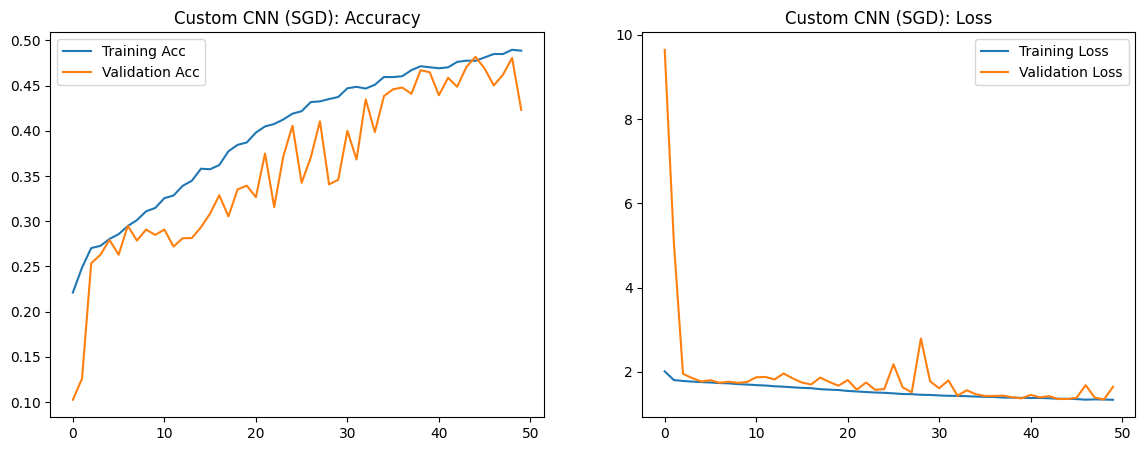

57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 408ms/step

--- Classification Report ---
               precision    recall  f1-score   support

       angry       0.47      0.27      0.34       958
     disgust       0.00      0.00      0.00       111
        fear       0.44      0.13      0.20      1024
       happy       0.50      0.93      0.65      1774
     neutral       0.45      0.47      0.46      1233
         sad       0.40      0.34      0.37      1247
    surprise       0.73      0.63      0.67       831

    accuracy                           0.50      7178
   macro avg       0.43      0.39      0.38      7178
weighted avg       0.48      0.50      0.46      7178



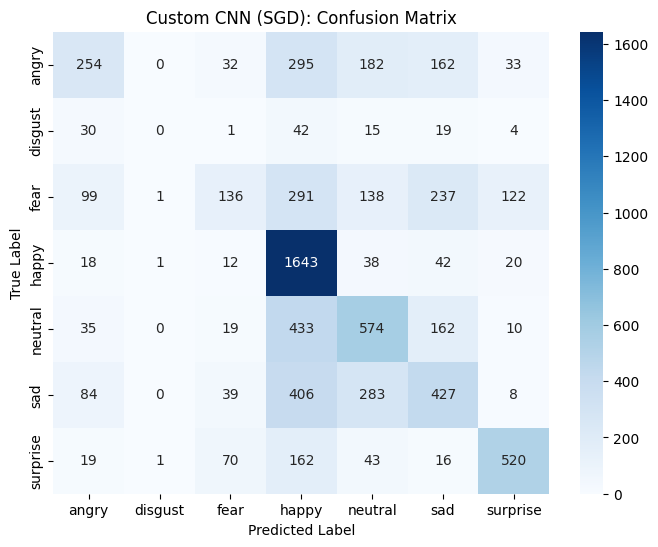

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print("--- FINAL EXPERIMENT: Custom CNN with SGD Optimizer ---")

# Data Setup
train_dir = "/content/train"
test_dir = "/content/test"
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(train_dir, target_size=(48, 48), color_mode="grayscale", batch_size=128, class_mode="categorical", subset="training")
val_data = train_datagen.flow_from_directory(train_dir, target_size=(48, 48), color_mode="grayscale", batch_size=128, class_mode="categorical", subset="validation")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(48, 48), color_mode="grayscale", batch_size=128, class_mode="categorical", shuffle=False)

# Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)), BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'), BatchNormalization(), MaxPooling2D(2,2), Dropout(0.25),
    Conv2D(128, (3,3), activation='relu', padding='same'), BatchNormalization(), MaxPooling2D(2,2), Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'), BatchNormalization(), Dropout(0.5),
    Dense(7, activation='softmax')
])

# Using the SGD optimizer for stability
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
epochs = 50
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# Evaluation & Plotting
test_loss, test_acc = model.evaluate(test_data)
print(f"\n✅ Final Test Accuracy with Custom CNN (SGD): {test_acc*100:.2f}%")
model.save('/content/drive/My Drive/AI_Project/emotion_model_custom_cnn_sgd.keras')
print("✅ Final Custom CNN model saved successfully!")

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1); plt.plot(history.history['accuracy'], label='Training Acc'); plt.plot(history.history['val_accuracy'], label='Validation Acc'); plt.title('Custom CNN (SGD): Accuracy'); plt.legend()
plt.subplot(1, 2, 2); plt.plot(history.history['loss'], label='Training Loss'); plt.plot(history.history['val_loss'], label='Validation Loss'); plt.title('Custom CNN (SGD): Loss'); plt.legend()
plt.show()

y_pred_probs = model.predict(test_data); y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = test_data.classes; class_names = list(test_data.class_indices.keys())
print("\n--- Classification Report ---\n", classification_report(y_true_classes, y_pred_classes, target_names=class_names))
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Custom CNN (SGD): Confusion Matrix'); plt.ylabel('True Label'); plt.xlabel('Predicted Label')
plt.show()

In [ ]:
!rm -rf /content/train
!rm -rf /content/test

Saved MobileNetV2



--- EVALUATING SAVED MobileNetV2 Model ---
Found 7178 images belonging to 7 classes.
Loading model from: /content/drive/My Drive/AI_Project/emotion_model_mobilenet_v2.keras


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 38s 297ms/step - accuracy: 0.5339 - loss: 1.2100

✅ Final Test Accuracy of Saved MobileNetV2: 55.63%
113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 297ms/step

--- Classification Report ---
              precision    recall  f1-score   support

       angry       0.42      0.50      0.46       958
     disgust       0.78      0.13      0.22       111
        fear       0.37      0.47      0.41      1024
       happy       0.85      0.75      0.80      1774
     neutral       0.59      0.42      0.49      1233
         sad       0.42      0.54      0.47      1247
    surprise       0.76      0.60      0.67       831

    accuracy                           0.56      7178
   macro avg       0.60      0.49      0.50      7178
weighted avg       0.59      0.56      0.56      7178



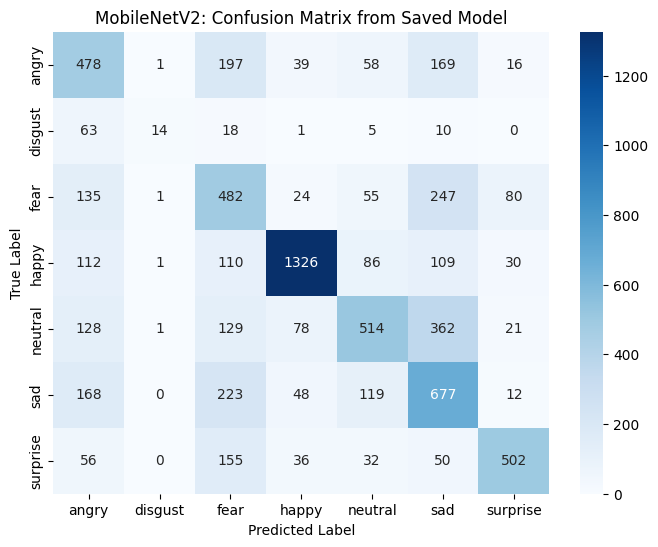

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print("\n\n--- EVALUATING SAVED MobileNetV2 Model ---")

# --- Data Setup (MUST MATCH THE ORIGINAL TRAINING SETUP for MobileNetV2) ---
test_dir = "/content/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(96, 96), # MobileNetV2 was trained on 96x96
    color_mode="rgb",     # MobileNetV2 was trained on RGB
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

# --- Load the Saved Model ---
model_path = "/content/drive/My Drive/AI_Project/emotion_model_mobilenet_v2.keras"
print(f"Loading model from: {model_path}")
model_mobilenet = tf.keras.models.load_model(model_path)

# --- Evaluation ---
test_loss, test_acc = model_mobilenet.evaluate(test_data)
print(f"\n✅ Final Test Accuracy of Saved MobileNetV2: {test_acc*100:.2f}%")

# --- Classification Report and Confusion Matrix ---
y_pred_probs = model_mobilenet.predict(test_data)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = test_data.classes
class_names = list(test_data.class_indices.keys())

print("\n--- Classification Report ---")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('MobileNetV2: Confusion Matrix from Saved Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

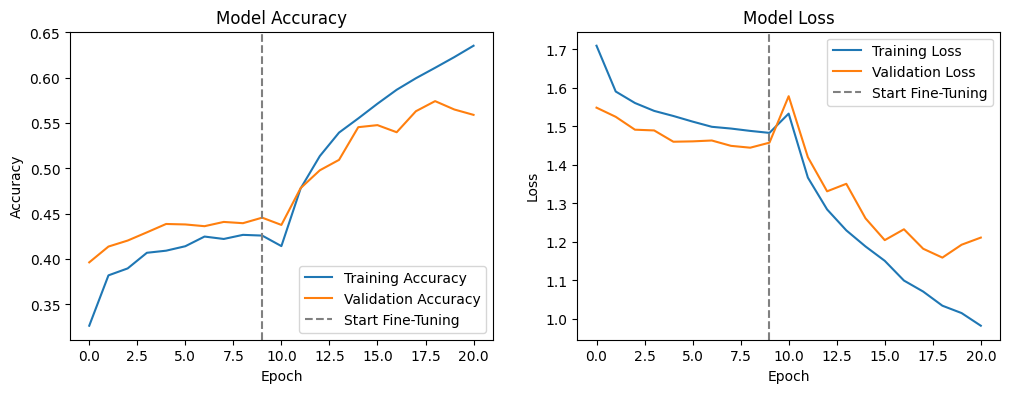



--- FINAL MODEL: MobileNetV2 with Fine-Tuning ---
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Starting Stage 1: Training the custom head ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 175s 475ms/step - accuracy: 0.2911 - loss: 1.8199 - val_accuracy: 0.3881 - val_loss: 1.5767
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 168s 469ms/step - accuracy: 0.3806 - loss: 1.6029 - val_accuracy: 0.4182 - val_loss: 1.5268
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 168s 469ms/step - accuracy: 0.3936 - loss: 1.5644 - val_accuracy: 0.4186 - val_loss: 1.4944
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 170s 473ms/step - accuracy: 0.4095 - loss: 1.5364 - val_accuracy: 0.4313 - val_loss: 1.4800
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 165s 459ms/step - accuracy: 0.4141 - loss: 1.5174 - val_accuracy: 0.4273 - val_loss: 1.5017
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 168s 467ms/step - accuracy: 0.4218 - loss: 1.4999 - val_accuracy: 0.4309 - val_loss: 1.4739
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 163s 453ms/step - accuracy: 0.4183 - loss: 1.5053 - val_accuracy: 0.4369 - val_loss: 1.4580
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 171s 475ms/step - accuracy: 0.4265 -

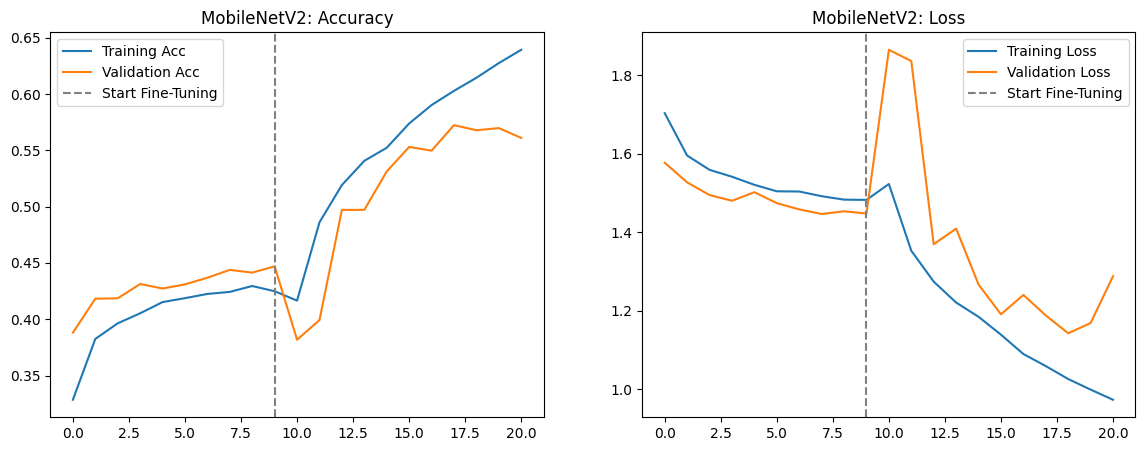

113/113 ━━━━━━━━━━━━━━━━━━━━ 35s 298ms/step

--- Classification Report ---
               precision    recall  f1-score   support

       angry       0.64      0.23      0.34       958
     disgust       0.67      0.20      0.31       111
        fear       0.58      0.21      0.30      1024
       happy       0.62      0.90      0.74      1774
     neutral       0.64      0.33      0.44      1233
         sad       0.37      0.71      0.49      1247
    surprise       0.71      0.73      0.72       831

    accuracy                           0.55      7178
   macro avg       0.60      0.47      0.48      7178
weighted avg       0.59      0.55      0.52      7178



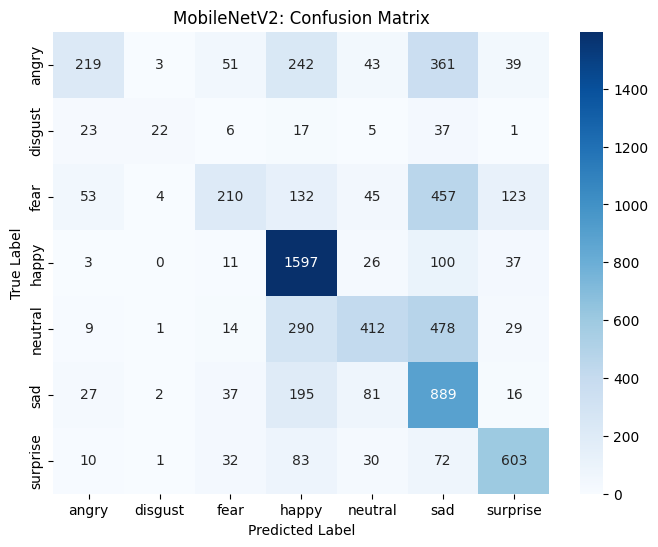

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print("\n\n--- FINAL MODEL: MobileNetV2 with Fine-Tuning ---")

# Data Setup
train_dir = "/content/train"
test_dir = "/content/test"
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest', validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(train_dir, target_size=(96, 96), color_mode="rgb", batch_size=64, class_mode="categorical", subset="training")
val_data = train_datagen.flow_from_directory(train_dir, target_size=(96, 96), color_mode="rgb", batch_size=64, class_mode="categorical", subset="validation")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(96, 96), color_mode="rgb", batch_size=64, class_mode="categorical", shuffle=False)

# Model (Stage 1)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False
x = base_model.output; x = GlobalAveragePooling2D()(x); x = Dense(128, activation='relu')(x); x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print("--- Starting Stage 1: Training the custom head ---")
initial_epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=initial_epochs)

# Model (Stage 2)
print("\n--- Starting Stage 2: Fine-tuning ---")
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs
history_fine = model.fit(train_data, epochs=total_epochs, initial_epoch=history.epoch[-1], validation_data=val_data)

# Evaluation
test_loss, test_acc = model.evaluate(test_data)
print(f"\n✅ Final Test Accuracy with MobileNetV2: {test_acc*100:.2f}%")
model.save('/content/drive/My Drive/AI_Project/emotion_model_mobilenet_v2_final.keras')
print("✅ Final MobileNetV2 model saved successfully!")

# Plotting & Reporting
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1); plt.plot(acc, label='Training Acc'); plt.plot(val_acc, label='Validation Acc'); plt.axvline(initial_epochs - 1, color='gray', linestyle='--', label='Start Fine-Tuning'); plt.title('MobileNetV2: Accuracy'); plt.legend()
plt.subplot(1, 2, 2); plt.plot(loss, label='Training Loss'); plt.plot(val_loss, label='Validation Loss'); plt.axvline(initial_epochs - 1, color='gray', linestyle='--', label='Start Fine-Tuning'); plt.title('MobileNetV2: Loss'); plt.legend()
plt.show()

y_pred_probs = model.predict(test_data); y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = test_data.classes; class_names = list(test_data.class_indices.keys())
print("\n--- Classification Report ---\n", classification_report(y_true_classes, y_pred_classes, target_names=class_names))
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('MobileNetV2: Confusion Matrix'); plt.ylabel('True Label'); plt.xlabel('Predicted Label')
plt.show()